In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from mytoolbox import *

# Hamiltonian, operators and eigenvalues
First explore eigenvalues of time independent Hamiltonian, and how they change and split around zfs as a function of the angle between the NV center axis and the applied magnetic field.

In particular explore the asymmetry in the splitting of the resonant frequencies as a function of the polar angle.

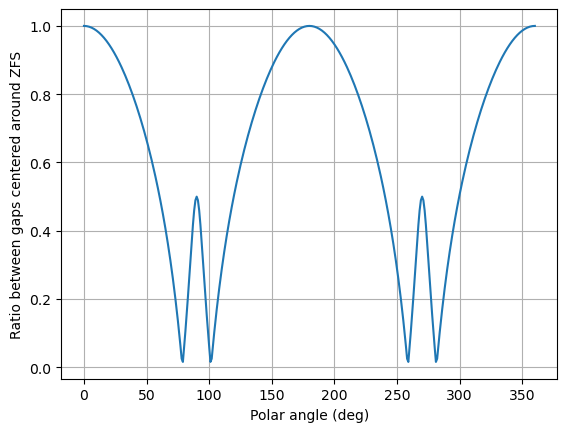

In [28]:
B = 0.015

angles = np.linspace(0, 360, 361)
ratios = []
for polar in angles:
    ratios.append(split_ratio_given_angles(D, g_e, B ,polar, 0))

plt.plot(angles, ratios)
plt.ylabel('Ratio between gaps centered around ZFS')
plt.xlabel('Polar angle (deg)')
plt.grid(True)

# ODMR experiment

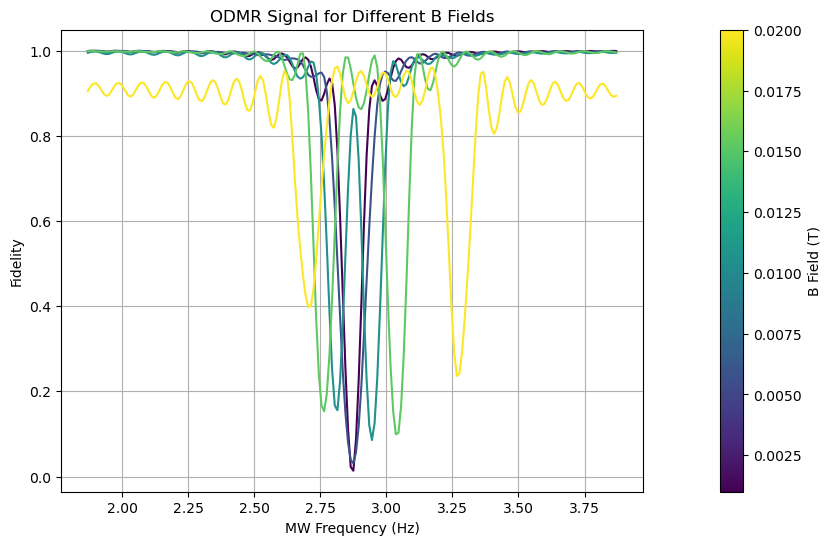

In [29]:
frequency_resolution = 200
frequency_width = 1
central_frequency = 2.87
frequency_range = np.linspace(central_frequency-frequency_width, central_frequency+frequency_width, frequency_resolution)

initial_state = qt.basis(3,1)

B = 0.0015
polar = 60   # Angle wrt z axis in degrees
azimuthal = 15   #Angle around the equator in degrees

B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    fidelities = odmr(D, g_e, B, polar, azimuthal, (0,0,1), frequency_range, 11.2*2*np.pi, 50, initial_state, Sx, 0.05)

    ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Fidelity')
ax.set_title('ODMR Signal for Different B Fields')
ax.grid(True)
plt.show()

# ODMR for 4 different orientations of NV

Consider now B to be always aligned with the $\hat{z}$ axis. Consider four NV orientations $[111]$, $[1\overline 1\overline 1]$, $[\overline 1 1\overline 1]$, $[\overline 1 \overline 1 1]$. It is clear from the Hamiltonian that the ODMR spectrum solely depends on the projection of $\vec B$ onto the NV center axis. For this reason we can reduce the problem to a sum of four ODMRs as seen above with different values of polar angle, found by computing the angle between x,y,z and the z axis.

Define relative abundances of the four orientations in the sample.

In [30]:
orientations = [
    [1,1,1],
    [1,-1,-1],
    [-1,1,-1],
    [-1,-1,1]
]

for orientation in orientations:
    print(f'Angle of orientation {orientation} wrt z axis {angle_between_vectors((orientation), (0,0,1)):.2f} degrees')


Angle of orientation [1, 1, 1] wrt z axis 54.74 degrees
Angle of orientation [1, -1, -1] wrt z axis 125.26 degrees
Angle of orientation [-1, 1, -1] wrt z axis 125.26 degrees
Angle of orientation [-1, -1, 1] wrt z axis 54.74 degrees


## Assume uniform abundances of orientations

Explore ODMR spectra for two arbitrarily chosen angles wrt B field of 0 and 60 degrees

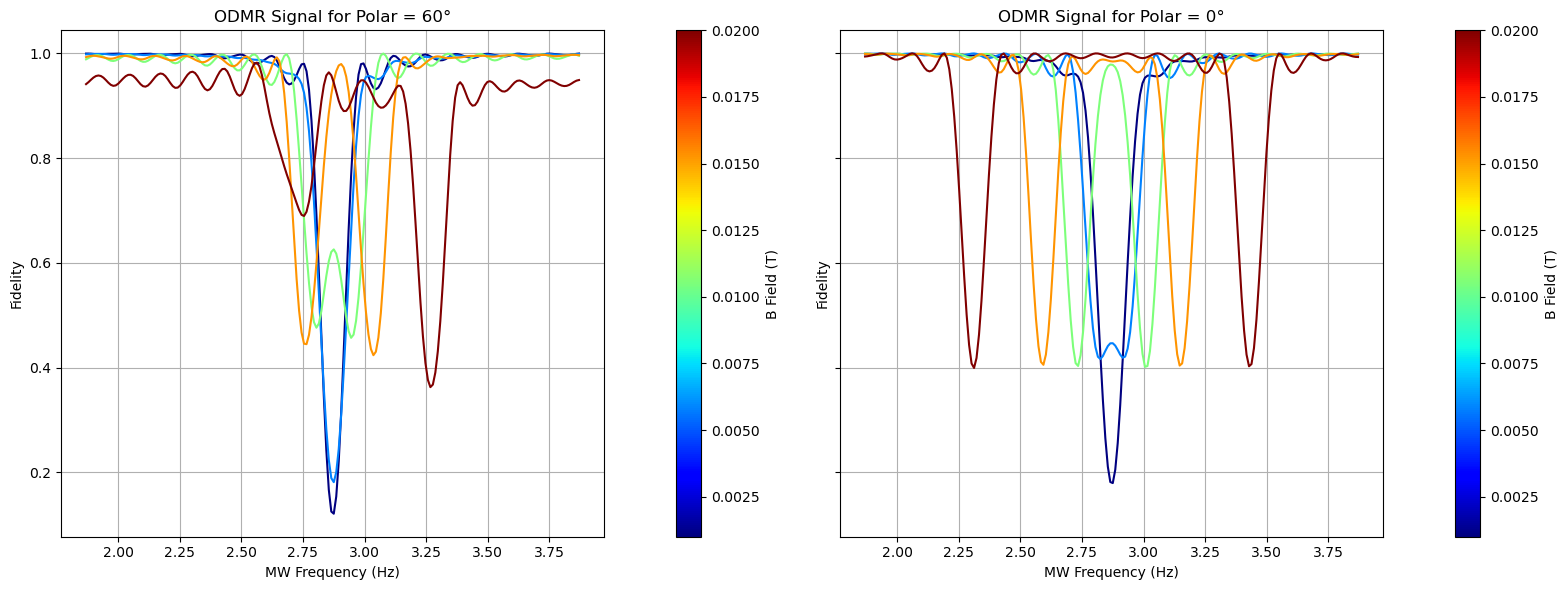

In [31]:
# Define B fields
B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Define polar angles
polar_angles = [60, 0]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

for i, polar in enumerate(polar_angles):
    ax = axs[i]
    colors = plt.cm.jet(np.linspace(0, 1, len(B_fields)))

    for idx, B in enumerate(B_fields):
        fidelities = odmr(D, g_e, B, polar, azimuthal, (0,0,1), frequency_range, 50, 200, initial_state, Sx, 0.05)

        ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label('B Field (T)')

    # Finalize plot
    ax.set_xlabel('MW Frequency (Hz)')
    ax.set_ylabel('Fidelity')
    ax.set_title(f'ODMR Signal for Polar = {polar}°')
    ax.grid(True)

# Show plot
plt.tight_layout()
plt.show()

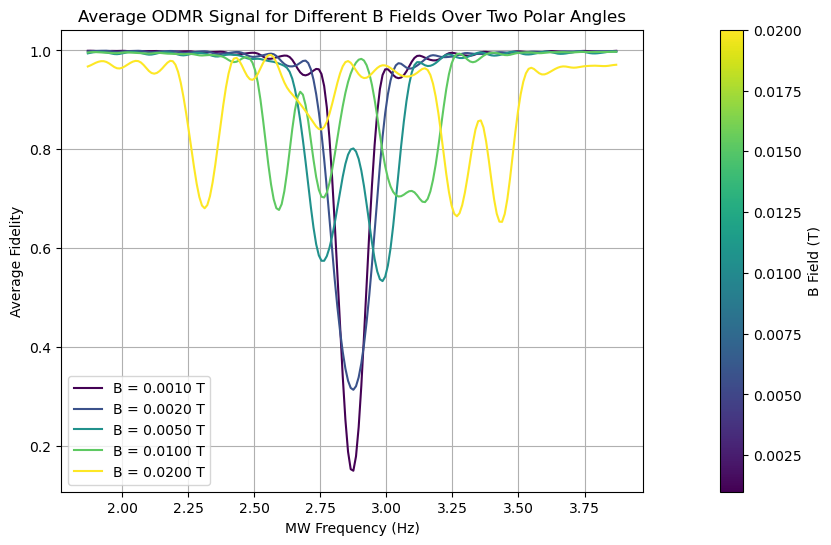

In [32]:
# Initialize an array to store average fidelities
average_fidelities = np.zeros((len(B_fields), len(frequency_range)))

# Compute average fidelities for each B field and frequency
for idx, B in enumerate(B_fields):
    fidelities_for_B = []

    for polar in polar_angles:
        fidelities = odmr(D, g_e, B, polar, azimuthal, (0,0,1), frequency_range, 50, 200, initial_state, Sx, 0.05)

        fidelities_for_B.append(fidelities)

    # Average over polar angles
    average_fidelities[idx, :] = np.mean(fidelities_for_B, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    ax.plot(frequency_range, average_fidelities[idx, :], color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Average Fidelity')
ax.set_title('Average ODMR Signal for Different B Fields Over Two Polar Angles')
ax.grid(True)
ax.legend()
plt.show()

# Real orientations, real B direction

[2824.7479223587043, 6842.910542611268, 7488.492389996113, 3470.32976974355]


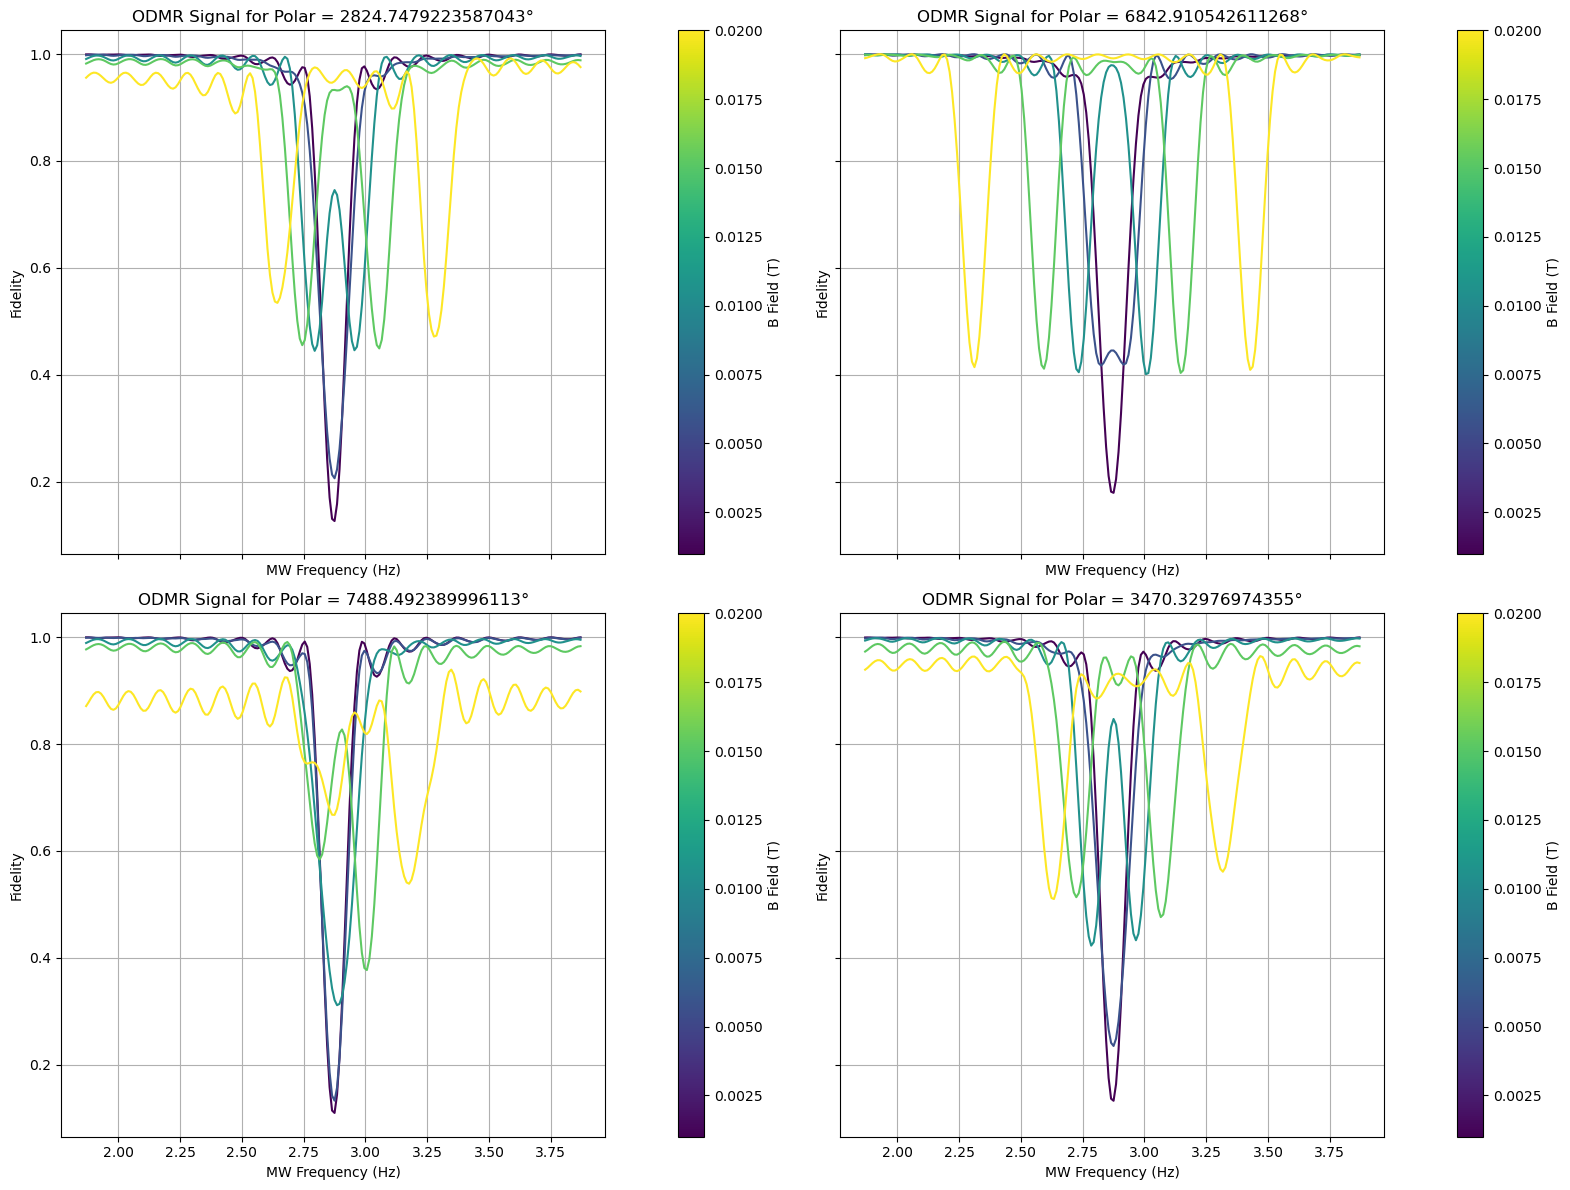

In [33]:
B = 0.01
polar = 8   # Angle wrt z axis in degrees
azimuthal = 0   #Angle around the equator in degrees

Bz = B * np.cos(polar * np.pi / 180)
Bx = B * np.sin(polar * np.pi / 180) * np.cos(azimuthal * np.pi / 180)
By = B * np.sin(polar * np.pi / 180) * np.sin(azimuthal * np.pi / 180)

effective_angles = []
for orientation in orientations:
    effective_angles.append(np.degrees(angle_between_vectors((orientation), (Bx, By, Bz))))

print(effective_angles)

polar_angles = effective_angles

# Define B fields
B_fields = [0.001, 0.002, 0.005, 0.01, 0.02]  # Tesla

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

for i, polar in enumerate(polar_angles):
    ax = axs[i // 2, i % 2]  # Determine subplot location
    colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

    for idx, B in enumerate(B_fields):
        fidelities = odmr(D, g_e, B, polar, azimuthal, (0,0,1), frequency_range, 50, 200, initial_state, Sx, 0.05)

        ax.plot(frequency_range, fidelities, color=colors[idx], label=f'B = {B:.4f} T')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label('B Field (T)')

    # Finalize plot
    ax.set_xlabel('MW Frequency (Hz)')
    ax.set_ylabel('Fidelity')
    ax.set_title(f'ODMR Signal for Polar = {polar}°')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

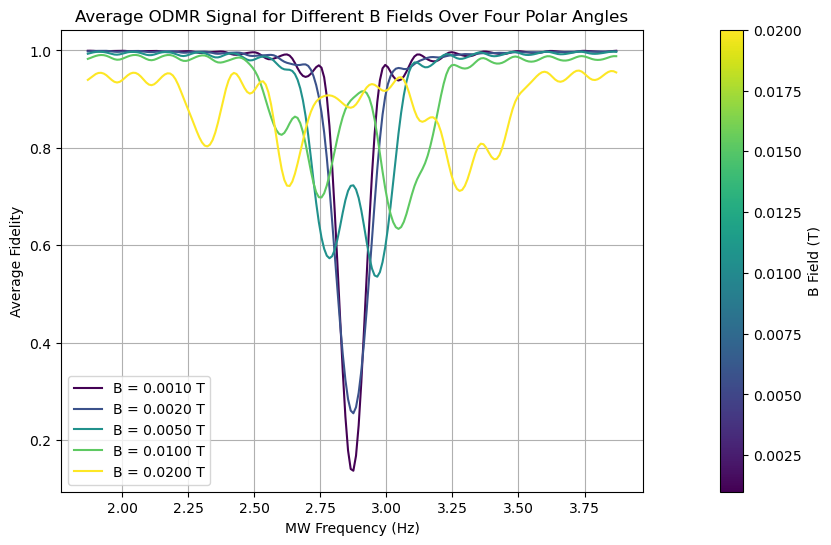

In [34]:
# Initialize an array to store average fidelities
average_fidelities = np.zeros((len(B_fields), len(frequency_range)))

# Compute average fidelities for each B field and frequency
for idx, B in enumerate(B_fields):
    fidelities_for_B = []

    for polar in polar_angles:
        fidelities = odmr(D, g_e, B, polar, azimuthal, (0,0,1), frequency_range, 50, 200, initial_state, Sx, 0.05)

        fidelities_for_B.append(fidelities)

    # Average over polar angles
    average_fidelities[idx, :] = np.mean(fidelities_for_B, axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(B_fields)))

for idx, B in enumerate(B_fields):
    ax.plot(frequency_range, average_fidelities[idx, :], color=colors[idx], label=f'B = {B:.4f} T')

# Add color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(B_fields), vmax=max(B_fields)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('B Field (T)')

# Finalize plot
ax.set_xlabel('MW Frequency (Hz)')
ax.set_ylabel('Average Fidelity')
ax.set_title('Average ODMR Signal for Different B Fields Over Four Polar Angles')
ax.grid(True)
ax.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


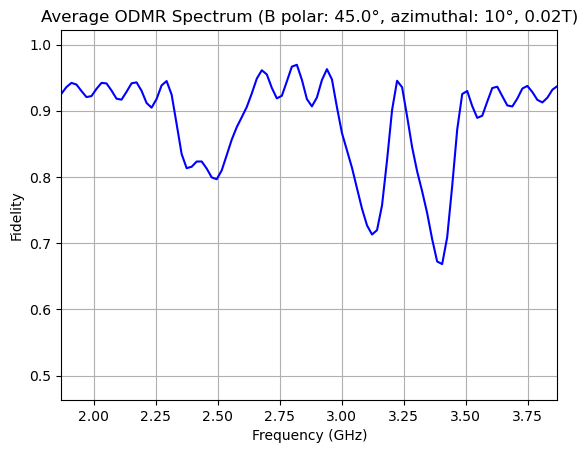

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import qutip as qt

# Constants
D = 2.87  # Zero-field splitting in GHz
g_e = -28.03  # Gyromagnetic ratio of the electron in GHz/T
B = 0.02  # Magnetic field magnitude in Tesla
azimuthal = 10  # Azimuthal angle in degrees (fixed)

nv_orientations = [
    (1, 1, 1),
    (1, -1, -1),
    (-1, 1, -1),
    (-1, -1, 1)
]  # Four possible NV orientations
frequencies = np.linspace(2.87-1, 2.87+1, 100)  # Frequency range for ODMR in GHz
t = 50  # Time for evolution in arbitrary units
n_evolution = 200  # Number of data points for numerical solution
initial_state = qt.basis(3, 1)  # Initial state (|0> state for S=1)
evolution_operator = Sx  # Example evolution operator (adjust as needed)
amp = 0.05  # Amplitude of applied pulse

# Generate ODMR data for different polar angles
polar_angles = np.linspace(0, 45, 90)
average_fidelities = []

for polar in polar_angles:
    avg_fidelity = np.zeros(len(frequencies))
    for orientation in nv_orientations:
        fidelities = odmr(D, g_e, B, polar, azimuthal, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
        avg_fidelity += np.array(fidelities)
    avg_fidelity /= len(nv_orientations)
    average_fidelities.append(avg_fidelity)

# Create the animation
fig, ax = plt.subplots()
line, = ax.plot(frequencies, average_fidelities[0], color='blue')
ax.set_xlim(frequencies[0], frequencies[-1])
#ax.set_ylim(0, 1)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Fidelity')
ax.set_title(f'Average ODMR Spectrum (B polar: 0°, azimuthal: {azimuthal}°, {B}T)')

plt.grid(True)

def update(frame):
    line.set_ydata(average_fidelities[frame])
    ax.set_title(f'Average ODMR Spectrum (B polar: {polar_angles[frame]:.1f}°, azimuthal: {azimuthal}°, {B}T)')
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(polar_angles), interval=100, blit=True)

# Save the animation
ani.save('average_odmr_spectrum.gif', writer='imagemagick')

# Show the animation
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


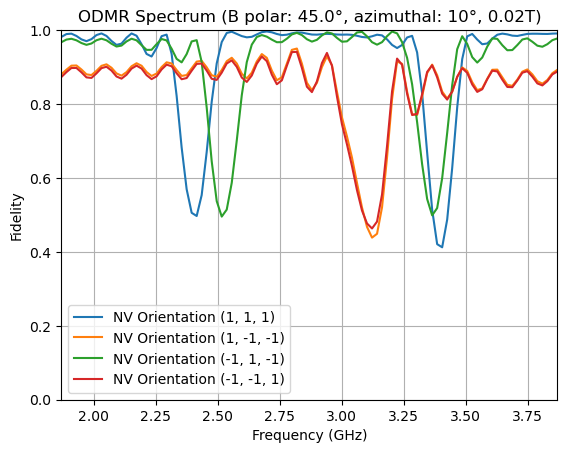

In [36]:
# Generate ODMR data for different polar angles
polar_angles = np.linspace(0, 45, 90)
individual_fidelities = {i: [] for i in range(len(nv_orientations))}

for polar in polar_angles:
    for i, orientation in enumerate(nv_orientations):
        fidelities = odmr(D, g_e, B, polar, azimuthal, orientation, frequencies, t, n_evolution, initial_state, evolution_operator, amp)
        individual_fidelities[i].append(fidelities)

# Create the animation
fig, ax = plt.subplots()
lines = [ax.plot(frequencies, individual_fidelities[i][0], label=f'NV Orientation {nv_orientations[i]}')[0] for i in range(len(nv_orientations))]

ax.set_xlim(frequencies[0], frequencies[-1])
ax.set_ylim(0, 1)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Fidelity')
ax.set_title(f'ODMR Spectrum (B polar: 0°, azimuthal: {azimuthal}°, {B}T)')
ax.legend()
plt.grid(True)

def update(frame):
    for i, line in enumerate(lines):
        line.set_ydata(individual_fidelities[i][frame])
    ax.set_title(f'ODMR Spectrum (B polar: {polar_angles[frame]:.1f}°, azimuthal: {azimuthal}°, {B}T)')
    return lines

ani = animation.FuncAnimation(fig, update, frames=len(polar_angles), interval=100, blit=True)

# Save the animation
ani.save('odmr_spectrum.gif', writer='imagemagick')

# Show the animation
plt.show()